## 1. Problem Understanding (Business Understanding)
*	Business Problem:
Organizations face the challenge of detecting spam messages, which can lead to fraud, poor user experience, and loss of trust.
*	Why the Problem Needs to Be Solved:
Spam messages waste users’ time, increase security risks, and reduce the reliability of communication platforms.
*	How Machine Learning Can Help:
Machine Learning can automatically analyze message content and classify messages as spam or ham (not spam) based on learned patterns from historical data.
*	Expected Output from the Model:
A classification model that predicts whether an incoming SMS is spam (1) or not spam (0) with high accuracy and precision.


## 2.import libraries and load the data

In [1]:
# import library
import pandas as pd
import numpy as np

In [2]:
import os
os.getcwd()

'E:\\project\\ML Project\\SMS-spam classifier'

In [3]:
# check encoder
!pip install chardet
import chardet

with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
print(result)


{'encoding': 'Windows-1252', 'confidence': 0.7269493857068697, 'language': ''}


| Encoding  | Use Case                                                          |
| --------- | ----------------------------------------------------------------- |
| `ASCII`   | Only English characters. Very old.                                |
| `UTF-8`   | Most commonly used. Supports all languages.                       |
| `latin-1` | Used in older European text files. Sometimes needed for old CSVs. |


In [4]:
# Load the data
df=pd.read_csv('spam.csv',encoding='Windows-1252')

## 3. Data Understanding:
 by  df.shape , df.head(), df.info()
*	Data size:5572*5
*   All column are categorical
*	v1 column store that sms is ham or spam
*	v2 column store sms content
*	unnamed2,unnamed3,unnamed4 is mostly content null value

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## 4.Data Cleaning

In [8]:
data=df.copy()

In [9]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
data.isnull().sum()/df.shape[0]*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

* Unnamed:2,Unnamed:4,Unnamed:4 have missing value that is greater than 40 to 50 % so drop these column

In [11]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [14]:
data.sample()

,target,text
4128,ham,Me i'm not workin. Once i get job...


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [16]:
data['target']=encoder.fit_transform(data['target'])

In [17]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
data.duplicated().sum()

np.int64(403)

In [20]:
data.drop_duplicates(keep='first',inplace=True)

In [21]:
data.shape

(5169, 2)

## 5.EDA

In [22]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

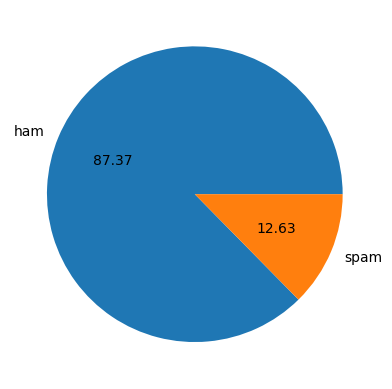

In [23]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

12.63% spam and 87.37% not spam so our data is imbalanced

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [26]:
data['num_characters']=data['text'].apply(lambda x:len(x))

In [27]:
data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
data['num_sentances']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
data.head()

,target,text,num_characters,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
data[['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
data[data['target']==0][['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
data[data['target']==1][['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

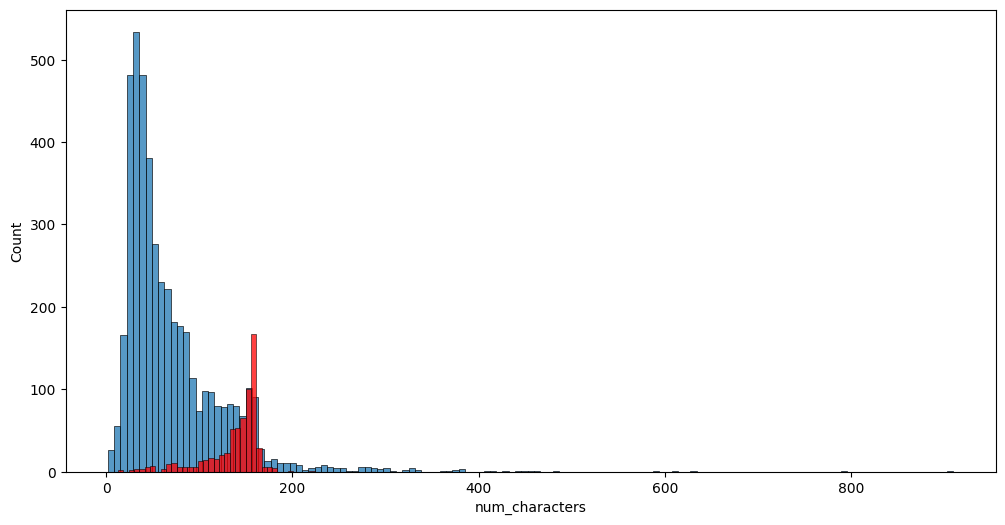

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_characters'])
sns.histplot(data[data['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

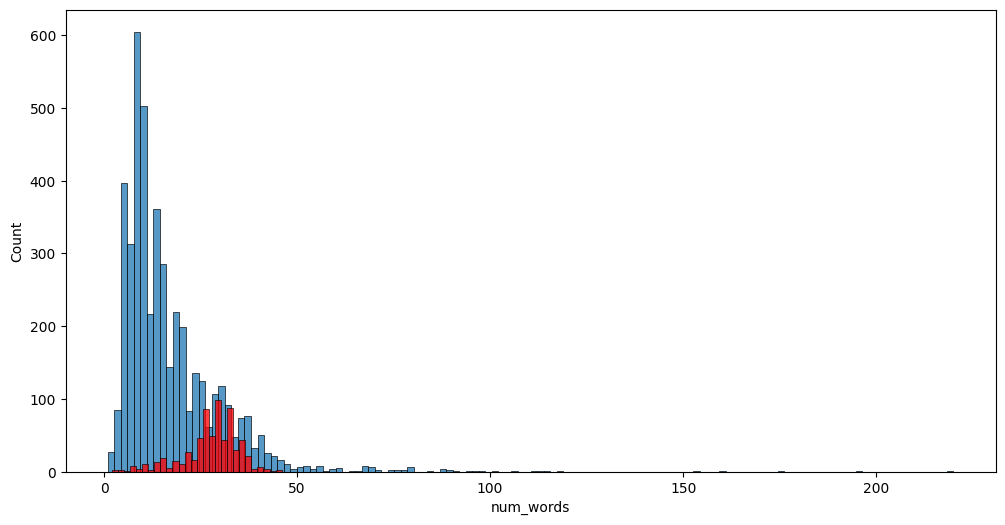

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_words'])
sns.histplot(data[data['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentances', ylabel='Count'>

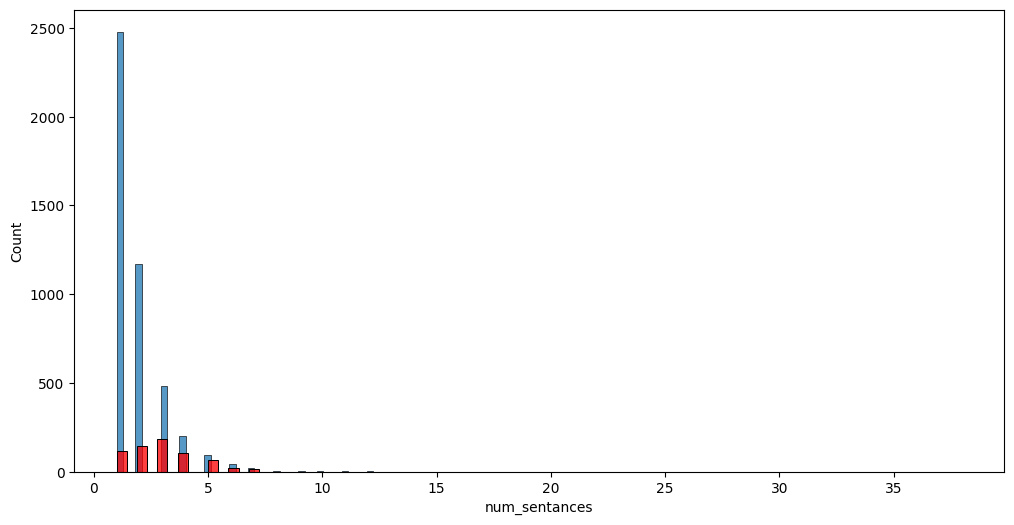

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_sentances'])
sns.histplot(data[data['target']==1]['num_sentances'],color='red')

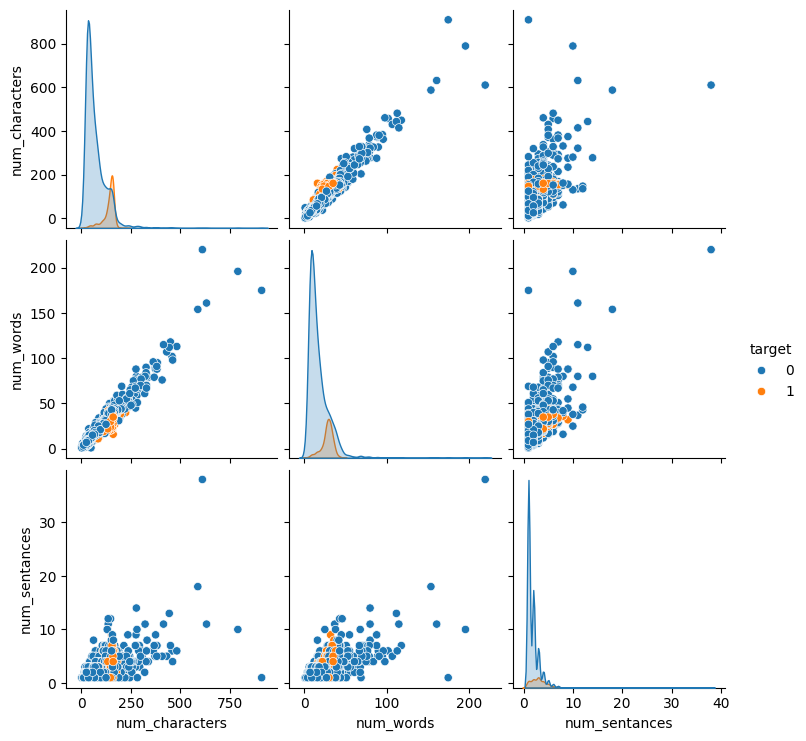

In [37]:
sns.pairplot(data,hue='target')

<Axes: >

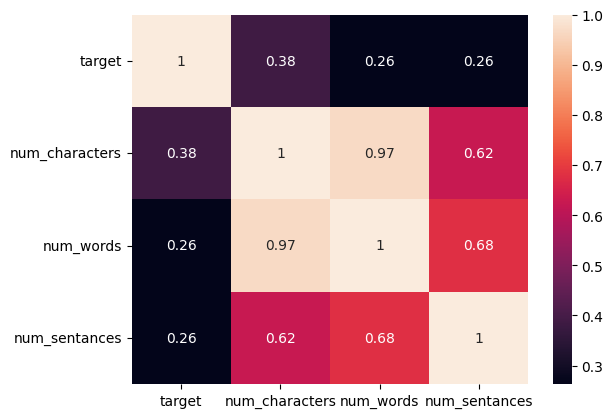

In [38]:
sns.heatmap(data[['target','num_characters','num_words','num_sentances']].corr(),annot=True)

In [39]:
data.head()

,target,text,num_characters,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# 6. Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [40]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [41]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [42]:
ps=PorterStemmer()

In [43]:
def transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [44]:
transform(data.iloc[1,1])

'ok lar joke wif u oni'

In [45]:
data['trans_text']=data['text'].apply(transform)

In [46]:
data.head()

,target,text,num_characters,num_words,num_sentances,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 7.EDA again

In [47]:
data['trans_num_characters']=data['trans_text'].apply(lambda x:len(x))
data['trans_num_words']=data['trans_text'].apply(lambda x:len(nltk.word_tokenize(x)))
data['trans_num_sentances']=data['trans_text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [48]:
data.head()

,target,text,num_characters,num_words,num_sentances,trans_text,trans_num_characters,trans_num_words,trans_num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,76,16,1
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,21,6,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,127,24,1
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,35,9,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,36,7,1


In [49]:
data[data['target']==0].describe()

,target,num_characters,num_words,num_sentances,trans_num_characters,trans_num_words,trans_num_sentances
count,4516.0,4516.000000,4516.000000,4516.000000,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195,39.197520,7.839681,0.998007
std,0.0,56.358207,13.493970,1.383657,31.500306,6.102374,0.044602
min,0.0,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.0,34.000000,8.000000,1.000000,18.000000,4.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000,30.000000,6.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000,52.000000,10.000000,1.000000
max,0.0,910.000000,220.000000,38.000000,389.000000,74.000000,1.000000


In [50]:
data[data['target']==1].describe()

,target,num_characters,num_words,num_sentances,trans_num_characters,trans_num_words,trans_num_sentances
count,653.0,653.000000,653.000000,653.000000,653.000000,653.000000,653.0
mean,1.0,137.891271,27.667688,2.970904,86.246554,15.220521,1.0
std,0.0,30.137753,7.008418,1.488425,25.176046,4.774396,0.0
min,1.0,13.000000,2.000000,1.000000,9.000000,1.000000,1.0
25%,1.0,132.000000,25.000000,2.000000,71.000000,12.000000,1.0
50%,1.0,149.000000,29.000000,3.000000,89.000000,15.000000,1.0
75%,1.0,157.000000,32.000000,4.000000,104.000000,18.000000,1.0
max,1.0,224.000000,46.000000,9.000000,143.000000,28.000000,1.0


In [51]:
data.duplicated().sum()

np.int64(0)

In [52]:
data=data[data['trans_num_characters']!=0]

In [53]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [54]:
spam_wc=wc.generate(data[data['target']==1]['trans_text'].str.cat(sep=" "))

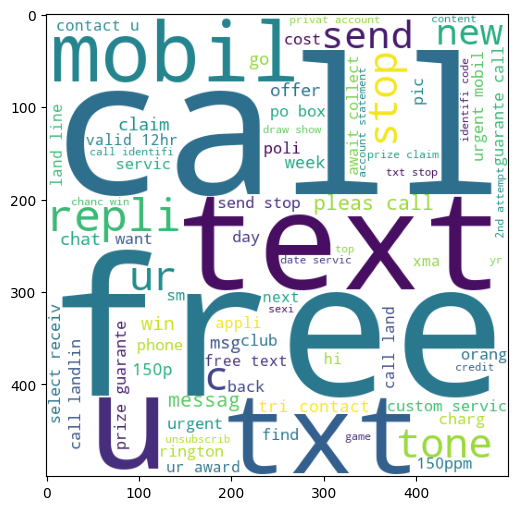

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [56]:
ham_wc=wc.generate(data[data['target']==0]['trans_text'].str.cat(sep=" "))

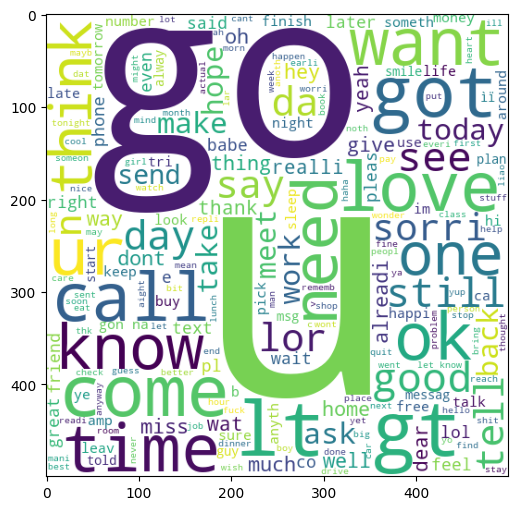

In [57]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [58]:
spam_corpus = []
for msg in data[data['target'] == 1]['trans_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [59]:
len(spam_corpus)

9939

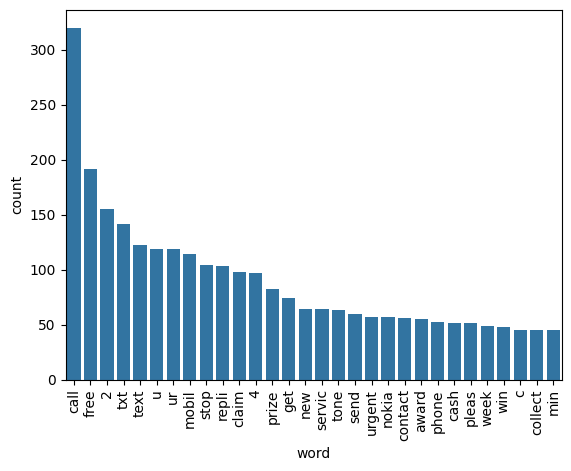

In [60]:
from collections import Counter
word_count = pd.DataFrame(Counter(spam_corpus).most_common(30))
word_count.columns = ['word', 'count']

# Plot
sns.barplot(x='word', y='count', data=word_count)
plt.xticks(rotation='vertical')
plt.show()

In [61]:
ham_corpus = []
for msg in data[data['target'] == 0]['trans_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [62]:
len(ham_corpus)

35404

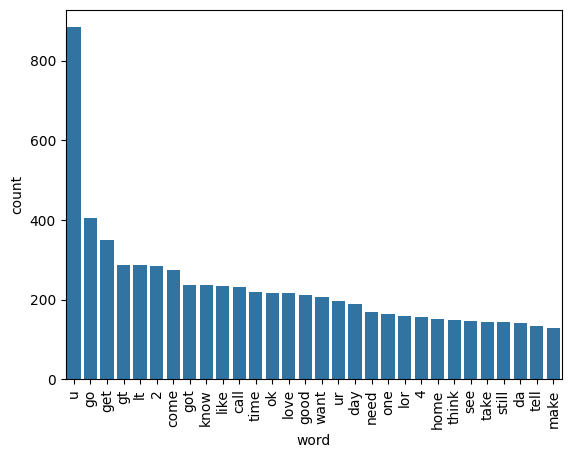

In [63]:
word_count = pd.DataFrame(Counter(ham_corpus).most_common(30))
word_count.columns = ['word', 'count']

# Plot
sns.barplot(x='word', y='count', data=word_count)
plt.xticks(rotation='vertical')
plt.show()

In [64]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.model_selection import train_test_split

In [65]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
def tune_max_features(model,df, text_col='trans_text', target_col='target',iscv=True):
    accuracies = []
    precisions = []
    X_train, X_test, y_train, y_test = train_test_split(df[text_col],df[target_col], test_size=0.2, random_state=2)
    feature_values=np.arange(2, 5001,200)
    for max_f in feature_values:
        if iscv:
            encoder= CountVectorizer(max_features=max_f)
        else:
            encoder= TfidfVectorizer(max_features=max_f)
        X_ftrain= encoder.fit_transform(X_train)
        x_ttest=encoder.transform(X_test)
        if isinstance(model, GaussianNB):
            X_ftrain = X_ftrain.toarray()
            x_ttest = x_ttest.toarray()
        model.fit(X_ftrain, y_train)
        y_pred = model.predict(x_ttest)
        
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        
        accuracies.append(acc)
        precisions.append(prec)
    
    # Find best
    best_index = precisions.index(max(precisions))
    best_features = feature_values[best_index]
    print("\nBest max_features:", best_features)
    print("Best Precision:", max(precisions))
    print("Best Accuracy:", accuracies[best_index])
    
    # Plot curves
    plt.figure(figsize=(7,5))
    plt.plot(feature_values, accuracies, marker='o', label='Accuracy')
    plt.plot(feature_values, precisions, marker='o', label='Precision')
    plt.xlabel("max_features")
    plt.ylabel("Score")
    plt.title(f"Effect of max_features on Accuracy and Precision for {model} and "
    f"{'CountVectorizer' if iscv else 'TF-IDF'}")
    plt.legend()
    plt.show()

    return best_features, accuracies, precisions


Best max_features: 802
Best Precision: 1.0
Best Accuracy: 0.9864341085271318


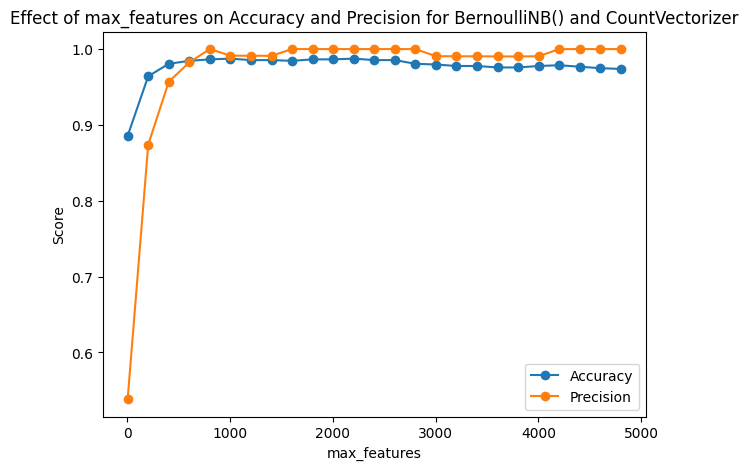


Best max_features: 2
Best Precision: 0.5384615384615384
Best Accuracy: 0.8856589147286822


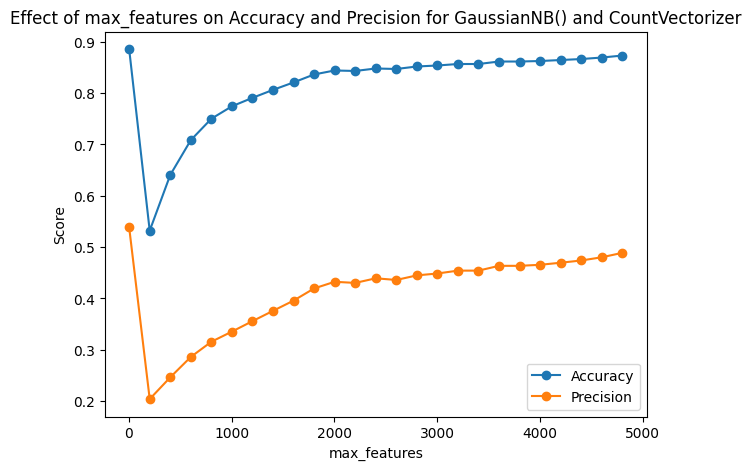


Best max_features: 4402
Best Precision: 0.9495798319327731
Best Accuracy: 0.9815891472868217


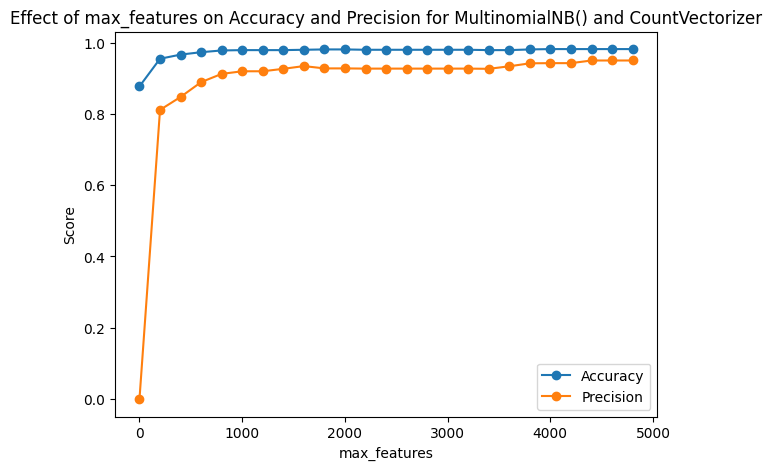

In [67]:
model=[bnb,gnb,mnb]
for m in model:
    tune_max_features(m,data,iscv=True)


Best max_features: 802
Best Precision: 1.0
Best Accuracy: 0.9864341085271318


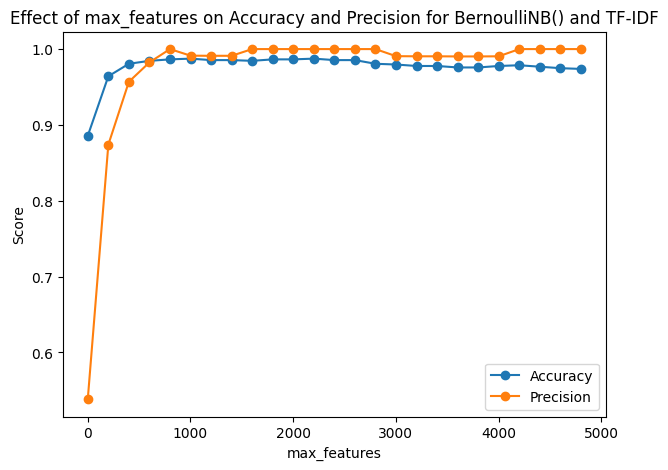


Best max_features: 2
Best Precision: 0.5384615384615384
Best Accuracy: 0.8856589147286822


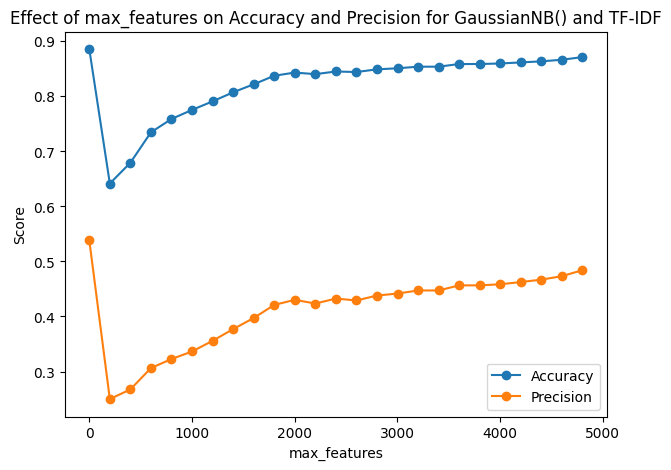

C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])



Best max_features: 2802
Best Precision: 1.0
Best Accuracy: 0.9699612403100775


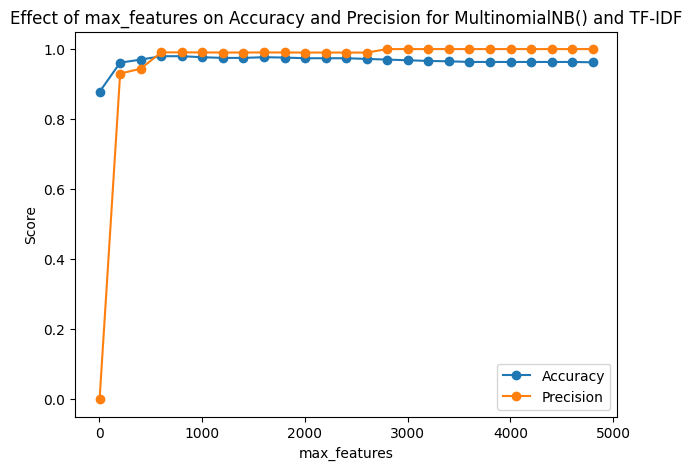

In [68]:
model=[bnb,gnb,mnb]
for m in model:
    tune_max_features(m,data,iscv=False)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(data['trans_text'],data['target'], test_size=0.2, random_state=2)

In [70]:
mnb=MultinomialNB()

In [71]:
encoder= TfidfVectorizer(max_features=3000)

In [72]:
x_ttrain=encoder.fit_transform(X_train)

In [73]:
x_ttest=encoder.transform(X_test)

In [74]:
mnb.fit(x_ttrain,y_train)
y_pred2 = mnb.predict(x_ttest)
print(f"accuracy_score:{accuracy_score(y_test,y_pred2)}")
print(f"confusion_matrix:\n{confusion_matrix(y_test,y_pred2)}")
print(f"precision_score:{precision_score(y_test,y_pred2)}")

accuracy_score:0.9680232558139535
confusion_matrix:
[[906   0]
 [ 33  93]]
precision_score:1.0


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [76]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [77]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': bnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'GBDT':gbdt,
    'xgb':xgb
}

In [78]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [79]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_ttrain,y_train,x_ttest,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9767441860465116
Precision -  0.9811320754716981
For  KN
Accuracy -  0.9273255813953488
Precision -  1.0
For  NB
Accuracy -  0.9796511627906976
Precision -  0.9906542056074766
For  DT
Accuracy -  0.937015503875969
Precision -  0.801980198019802
For  LR
Accuracy -  0.9631782945736435
Precision -  0.9583333333333334
For  RF
Accuracy -  0.9689922480620154
Precision -  0.9895833333333334
For  GBDT
Accuracy -  0.9554263565891473
Precision -  0.925531914893617
For  xgb
Accuracy -  0.9680232558139535
Precision -  0.911504424778761


In [80]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [81]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.927326,1.000000
2,NB,0.979651,0.990654
5,RF,0.968992,0.989583
0,SVC,0.976744,0.981132
4,LR,0.963178,0.958333
6,GBDT,0.955426,0.925532
7,xgb,0.968023,0.911504
3,DT,0.937016,0.801980


In [82]:
import pickle
pickle.dump(encoder,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))